In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("titanic_toy.csv")

In [7]:
df.sample(5)

,Age,Fare,Family,Survived
677,18.0,9.8417,0,1
403,28.0,15.8500,1,0
98,34.0,NaN,1,1
738,NaN,7.8958,0,0
346,40.0,13.0000,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [10]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=67, test_size=0.2)

In [15]:
X_train.head()

,Age,Fare,Family
873,47.0,9.0000,0
649,23.0,NaN,0
713,29.0,9.4833,0
135,23.0,15.0458,0
639,NaN,16.1000,1


In [16]:
X_test.head()

,Age,Fare,Family
695,52.0,13.5000,0
82,NaN,NaN,0
765,51.0,77.9583,1
27,19.0,263.0000,5
844,17.0,8.6625,0


In [18]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [22]:
X_train.isnull().mean()

Age       0.220506
Fare      0.053371
Family    0.000000
dtype: float64

# Filling missing values with Mean/Median

### 1. Using pandas 

In [23]:
X_train['Age_mean'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Age_median'] = X_train['Age'].fillna(X_train['Age'].median())

X_train['Fare_mean'] = X_train['Fare'].fillna(X_train['Fare'].mean())
X_train['Fare_median'] = X_train['Fare'].fillna(X_train['Fare'].median())

In [25]:
X_train.head()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
873,47.0,9.0000,0,47.000000,47.0,9.000000,9.00000
649,23.0,NaN,0,23.000000,23.0,31.027577,14.47915
713,29.0,9.4833,0,29.000000,29.0,9.483300,9.48330
135,23.0,15.0458,0,23.000000,23.0,15.045800,15.04580
639,NaN,16.1000,1,29.625081,28.0,16.100000,16.10000


In [29]:
#original variance of Age
print(X_train['Age'].var())

#variance of age after imputing with mean
print(X_train['Age_mean'].var())

#variance of age after imputing with median
print(X_train['Age_median'].var())

211.22734453312535
164.5850195096362
165.03958149149045


In [35]:
# Original variacne of Fare
print(X_train['Fare'].var())

# variance of Fare after imputing with mean
print(X_train['Fare_mean'].var())

# variance of Fare after imputing with median
print(X_train['Fare_median'].var())

2247.438036060769
2127.3217978465505
2141.1768242990775


### Visualizing change in distribution after filling missing values

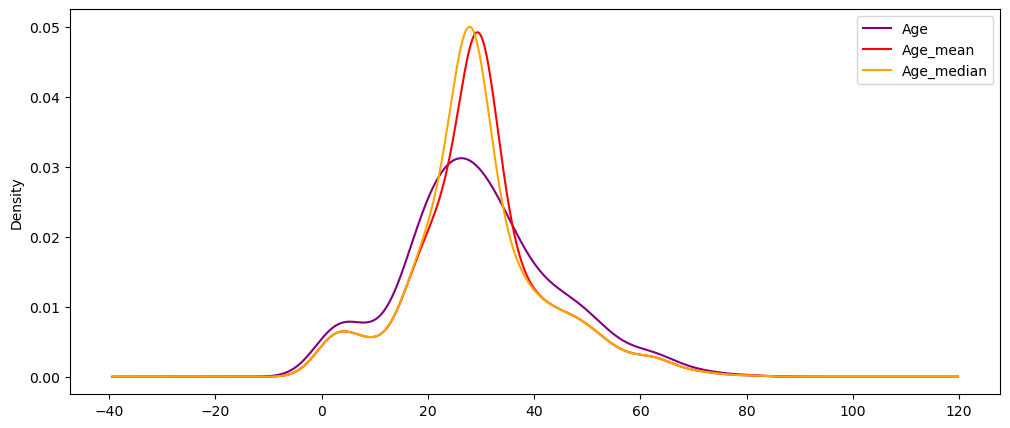

In [47]:
# visualizing change in kde before and after imputing mean/median to the Age column
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax, color='purple')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Age_median'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


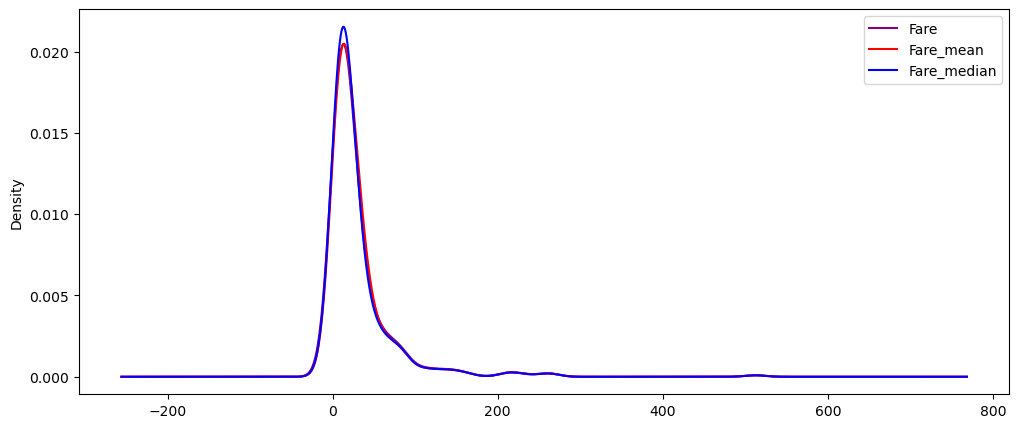

In [48]:
# visualizing change in kde before and after imputing mean/median to the Fare column
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax, color='purple')
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_median'].plot(kind='kde', ax=ax, color='blue')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### The distribution of Age column changes drastically but distribution of Fare doesn't change very much,which might be due to the fact that Age column had around 22%  missing values wheras Fare column had only 5% missing values. So it's more likely that column with large number of missing values results in more change in distribution (due to decreasing variance) of the data compared to column with small number of missing values after imputing with mean or median

In [49]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,211.227345,46.339748,-7.912599,211.227345,211.227345,43.317902,41.402516
Fare,46.339748,2247.438036,17.042151,35.658422,38.506570,2247.438036,2247.438036
Family,-7.912599,17.042151,2.730693,-6.165372,-6.095115,16.131319,16.265346
Age_mean,211.227345,35.658422,-6.165372,164.585020,164.585020,33.752627,32.260189
Age_median,211.227345,38.506570,-6.095115,164.585020,165.039581,36.448554,34.828302
Fare_mean,43.317902,2247.438036,16.131319,33.752627,36.448554,2127.321798,2127.321798
Fare_median,41.402516,2247.438036,16.265346,32.260189,34.828302,2127.321798,2141.176824


In [50]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.062560,-0.357061,1.000000,1.000000,0.060774,0.057852
Fare,0.062560,1.000000,0.213933,0.058363,0.062950,1.000000,1.000000
Family,-0.357061,0.213933,1.000000,-0.290822,-0.287112,0.211649,0.212716
Age_mean,1.000000,0.058363,-0.290822,1.000000,0.998622,0.057042,0.054343
Age_median,1.000000,0.062950,-0.287112,0.998622,1.000000,0.061513,0.058588
Fare_mean,0.060774,1.000000,0.211649,0.057042,0.061513,1.000000,0.996759
Fare_median,0.057852,1.000000,0.212716,0.054343,0.058588,0.996759,1.000000


<Axes: >

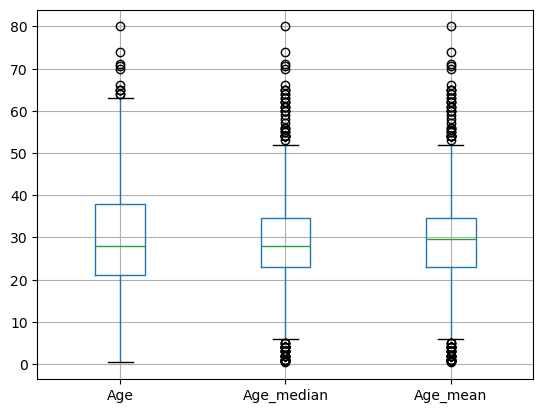

In [51]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

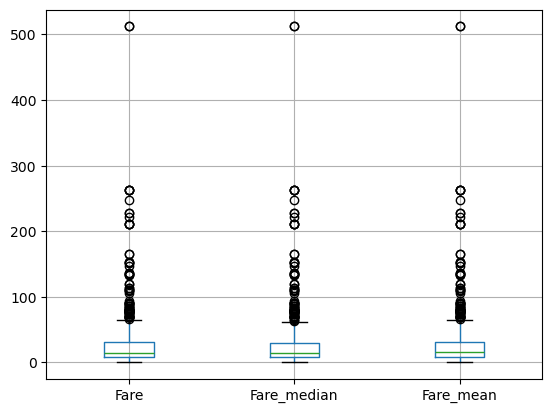

In [52]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### 2. Using sklearn

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [82]:
trf = ColumnTransformer([
    ('Age_imp', imputer1, ['Age']),
    ('Fare_imp', imputer2, ['Fare'])
], remainder='passthrough')

In [83]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [84]:
X_train_transformed

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [85]:
np.isnan(X_train_transformed).any()

False

In [86]:
trf.named_transformers_

{'Age_imp': SimpleImputer(strategy='median'),
 'Fare_imp': SimpleImputer(),
 'remainder': 'passthrough'}

In [87]:
trf.named_transformers_['Age_imp'].statistics_

array([28.75])